- Model SGDClassifier 
- StandardScaler()
- Variables: 'OverTime', 'JobChangeFrequency', 'TotalWorkingYears', 'JobLevel', 'MaritalStatus', 'YearsInCurrentRole', 'CompanyLoyaltyRatio','StockOptionLevel', 'OverallSatisfaction', 'DistanceFromHome', 'WorkLifeBalance'
- class_weight='balanced'
- GridSearchCV

In [5]:
# imports 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier

import joblib

C:\Users\bdelavega1\AppData\Local\Temp\ipykernel_30156\4252704408.py:25: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X.replace(label_encoders, inplace=True)



Accuracy: 0.7109
Precision: 0.2500
Recall: 0.5897
F1 Score: 0.3511
ROC AUC Score: 0.6596



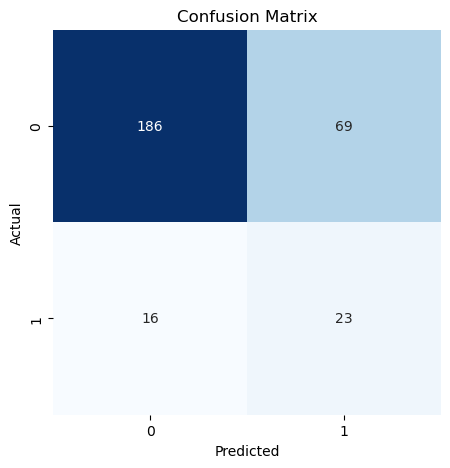

['FinalModel.pkl']

In [6]:
# Load dataset
data = pd.read_csv('../data/HR-Employee-Attrition.csv')

# New Variables
data['JobChangeFrequency'] = (data['NumCompaniesWorked'] / data['TotalWorkingYears']) .replace([np.inf, -np.inf], np.nan).fillna(0).astype(int)

data['CompanyLoyaltyRatio'] = (data['YearsAtCompany'] / data['Age']) .replace([np.inf, -np.inf], np.nan).fillna(0).astype(int)

data['OverallSatisfaction'] = ((data['JobSatisfaction'] + data['EnvironmentSatisfaction'] + data['RelationshipSatisfaction']) / 3).replace([np.inf, -np.inf], np.nan).fillna(0).astype(int)

# Define features and target
features = [
    'OverTime', 'JobChangeFrequency', 'TotalWorkingYears', 'JobLevel',
    'MaritalStatus', 'YearsInCurrentRole', 'CompanyLoyaltyRatio',
    'StockOptionLevel', 'OverallSatisfaction', 'DistanceFromHome', 'WorkLifeBalance'
]
X = data[features].copy()
y = data['Attrition'].map({'Yes': 1, 'No': 0})

# Encode categorical variables
label_encoders = {
    'OverTime': {'Yes': 1, 'No': 0},
    'MaritalStatus': {'Single': 0, 'Married': 1, 'Divorced': 2}
}
X.replace(label_encoders, inplace=True)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define model with class weight balancing
model = SGDClassifier(loss='log_loss', class_weight='balanced', random_state=42)

# Hyperparameter tuning using Grid Search
param_grid = {
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'max_iter': [1000, 2000, 5000]
}
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='f1_weighted', n_jobs=-1)

# Train the model
grid_search.fit(X_train, y_train)

# Best model selection
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print metrics
metrics_text = f"""
Accuracy: {accuracy:.4f}
Precision: {precision:.4f}
Recall: {recall:.4f}
F1 Score: {f1:.4f}
ROC AUC Score: {roc_auc:.4f}
"""
print(metrics_text)

# Display confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Save model and scaler
joblib.dump(scaler, "scaler.pkl")
joblib.dump(grid_search.best_estimator_, "FinalModel.pkl")